### Membros do grupo:
- Ana Laura
- Gerônimo Augusto
- Ianny raquel
- Murilo Cordeiro
- Vitor Augusto

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("dasa-final.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   unidade                     1000 non-null   object 
 1   mes                         1000 non-null   object 
 2   tipo_exame                  921 non-null    object 
 3   pacientes_dia               1000 non-null   int64  
 4   exames_realizados           1000 non-null   int64  
 5   turno_mais_movimentado      1000 non-null   object 
 6   temp_medio_exame            920 non-null    float64
 7   protocolo_emergencia        920 non-null    object 
 8   direcao_centrifuga          1000 non-null   object 
 9   quantidade_refrigeradores   1000 non-null   int64  
 10  alinhamento_refrigeradores  1000 non-null   object 
 11  cor_parede_laboratorio      1000 non-null   object 
 12  cor_parede_coleta           1000 non-null   object 
 13  aromatizador_eucalipto      1000 n

In [19]:
df.head()

,unidade,mes,tipo_exame,pacientes_dia,exames_realizados,turno_mais_movimentado,temp_medio_exame,protocolo_emergencia,direcao_centrifuga,quantidade_refrigeradores,...,cor_jaleco_funcionario,elemento_decorativo,janela_virada_para,hora_inicio_turno,cpf_biomedico,mes_nascimento_biomedico,dia_fechamento,chefe_setor,tipo_refrigeracao,tempo_entrega_resultado
0,Unidade C,jun/2025,sangue,52,72,manhã,20.1,não,norte,2,...,verde_limao,cacto,leste,9,97069094493,set,23,Carlos,controlada,22.17
1,Unidade E,mai/2025,imagem,56,48,tarde,16.6,não,leste,2,...,azul_bebe,nenhum,nenhuma,7,87320570731,nov,3,Ana,climatizada,33.48
2,Unidade A,mai/2025,NaN,44,67,manhã,18.6,não,sul,1,...,branco,nenhum,norte,12,37306026087,mar,8,Eduardo,seca,41.57
3,Unidade D,fev/2025,imagem,51,57,noite,10.0,não,norte,2,...,azul_bebe,cacto,nenhuma,8,56594789692,nov,17,Nina,controlada,34.92
4,Unidade D,jul/2024,urina,56,69,noite,24.4,não,oeste,3,...,verde_limao,vaso_bambu,leste,12,38100952961,jul,29,1234,controlada,32.59


In [20]:
df['tempo_entrega_resultado'].mean()

np.float64(31.916430000000002)

### Tratamento de dados:

In [21]:
# Preencher valores nulos
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])



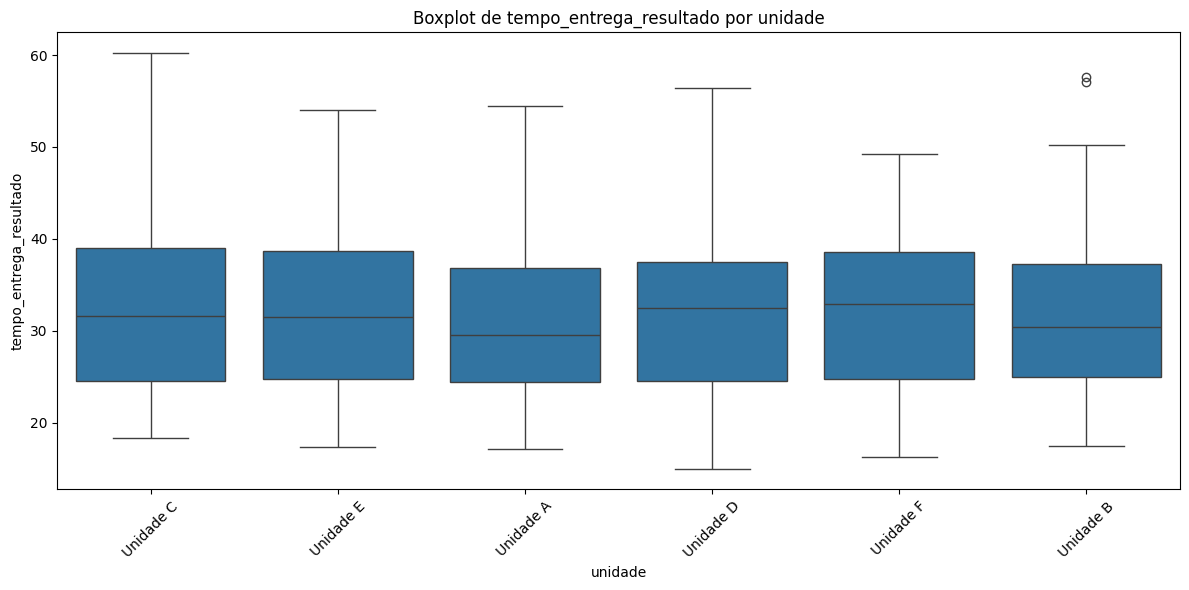

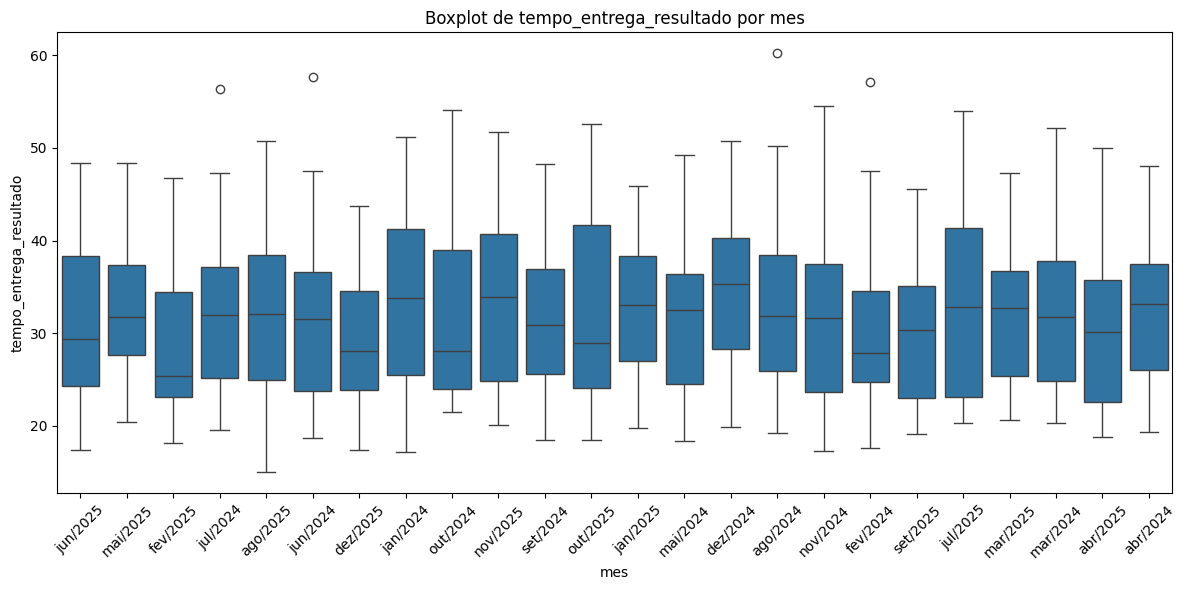

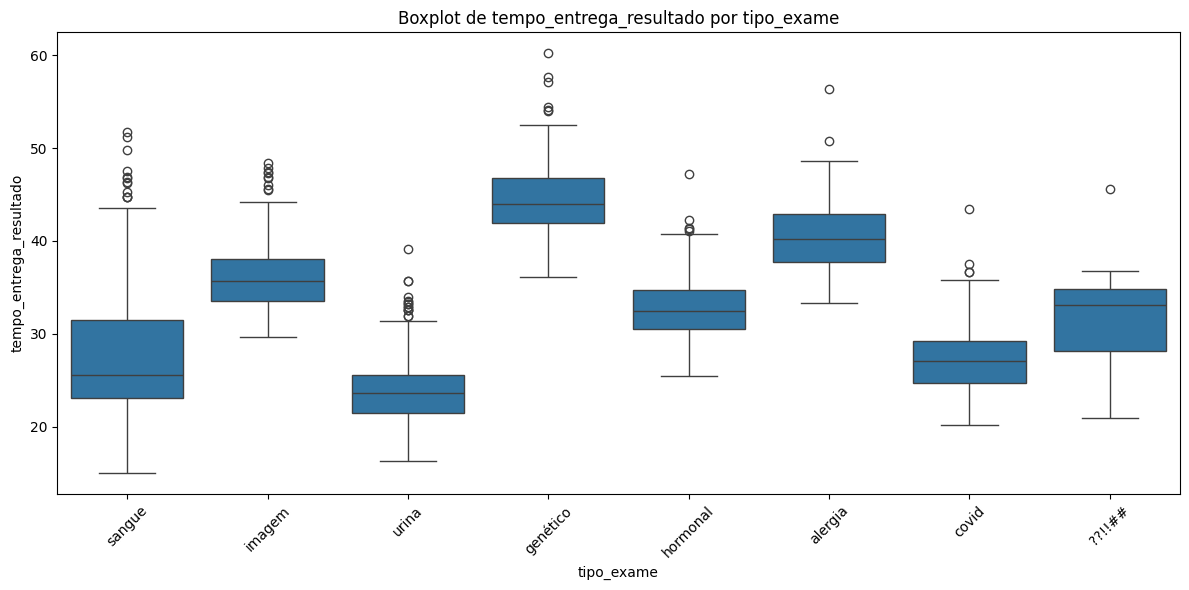

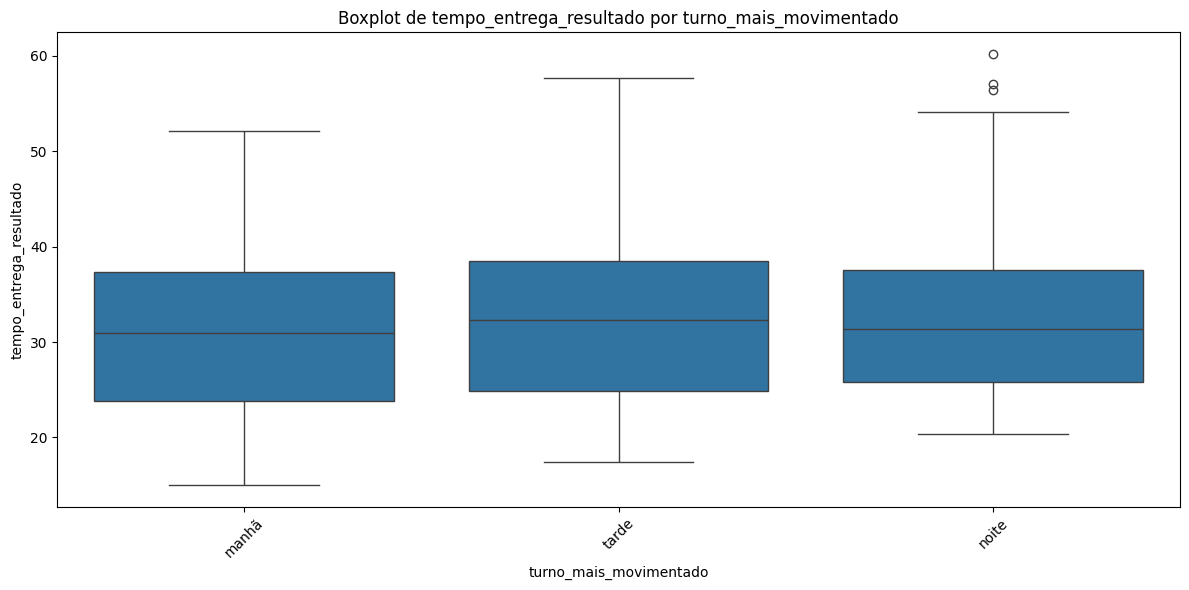

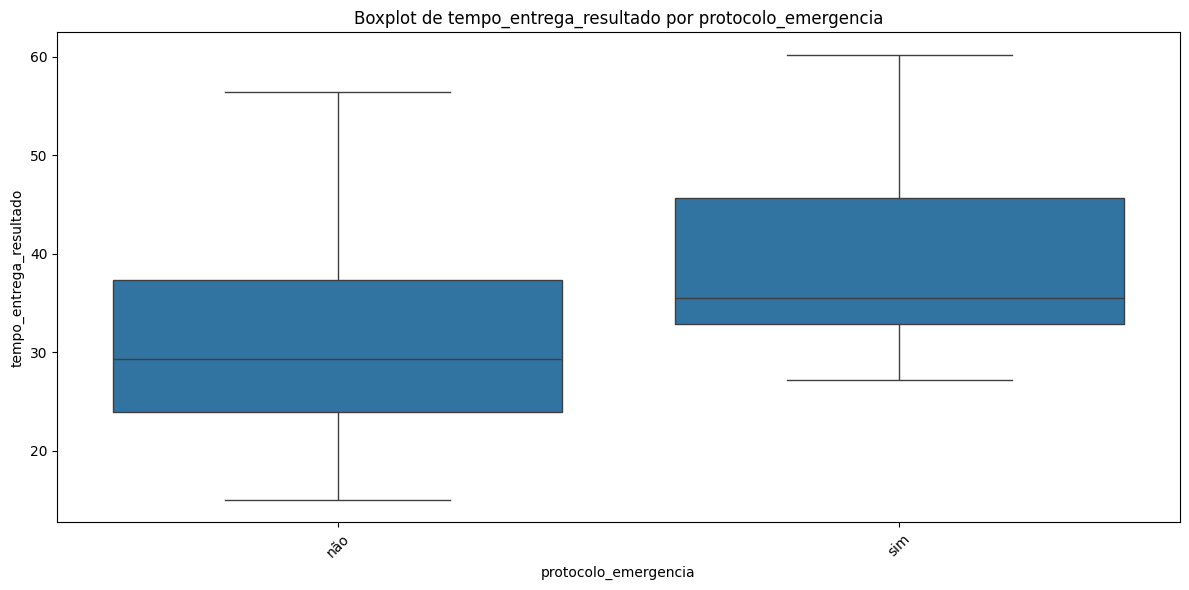

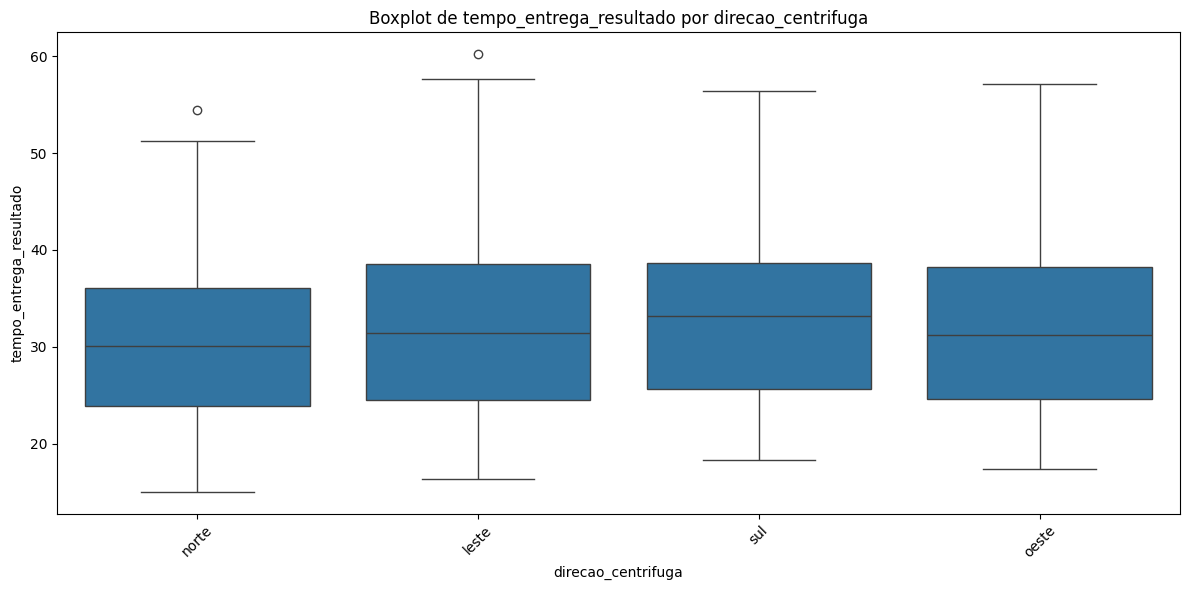

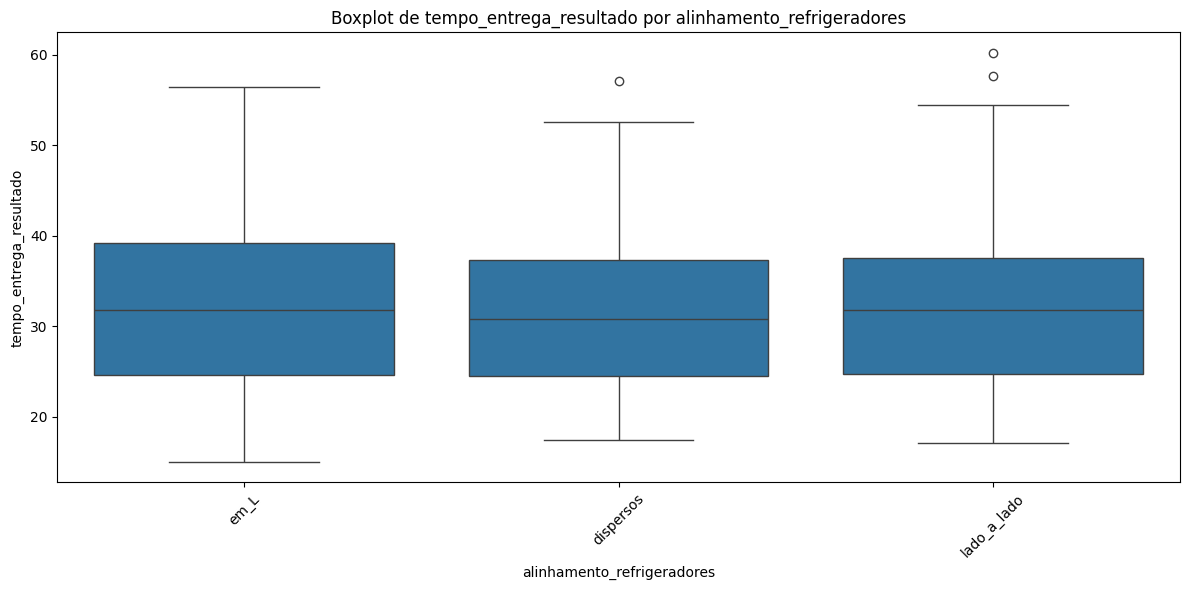

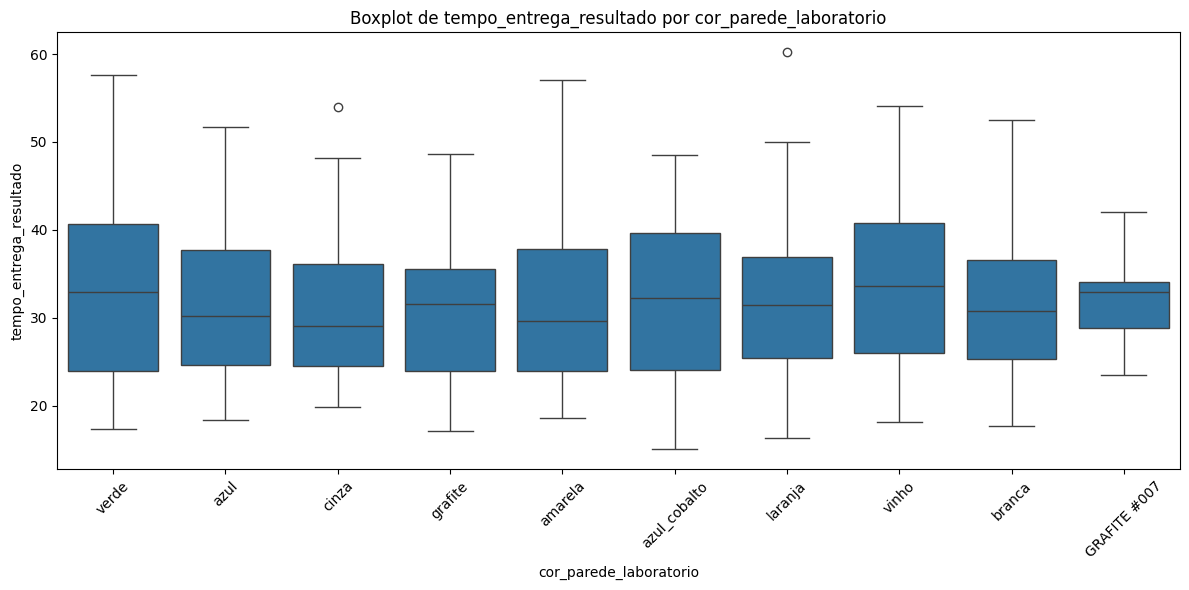

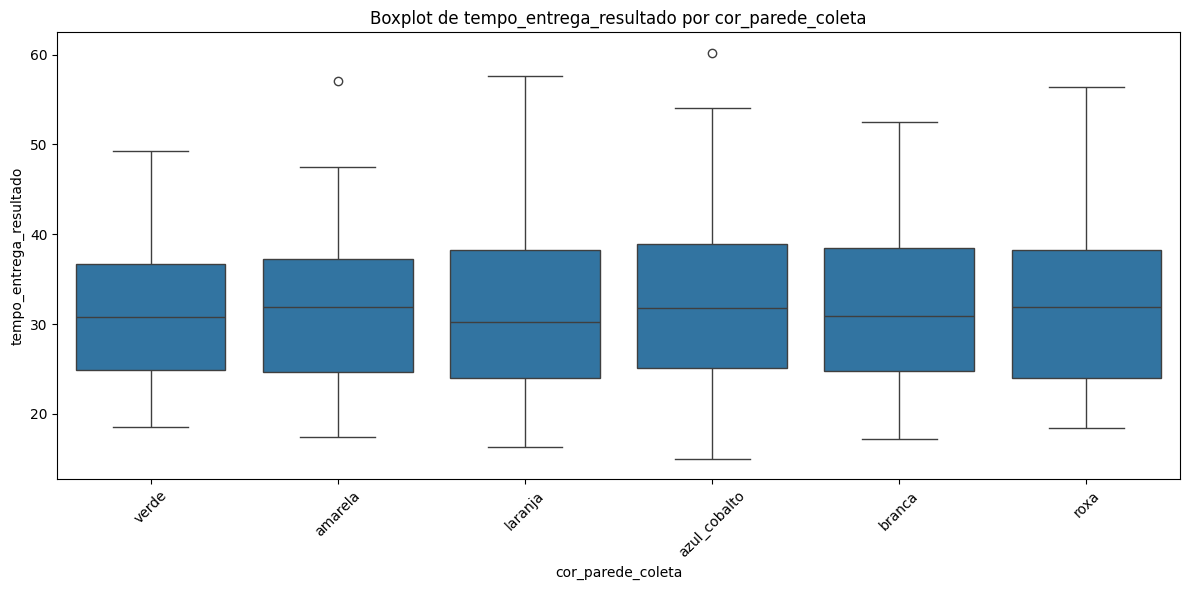

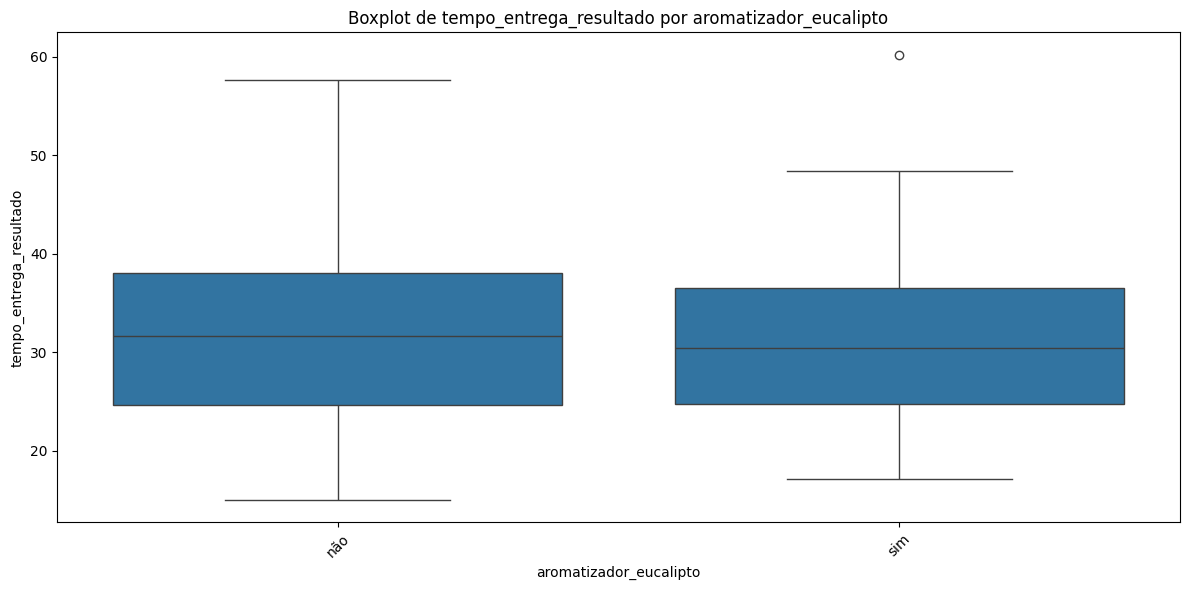

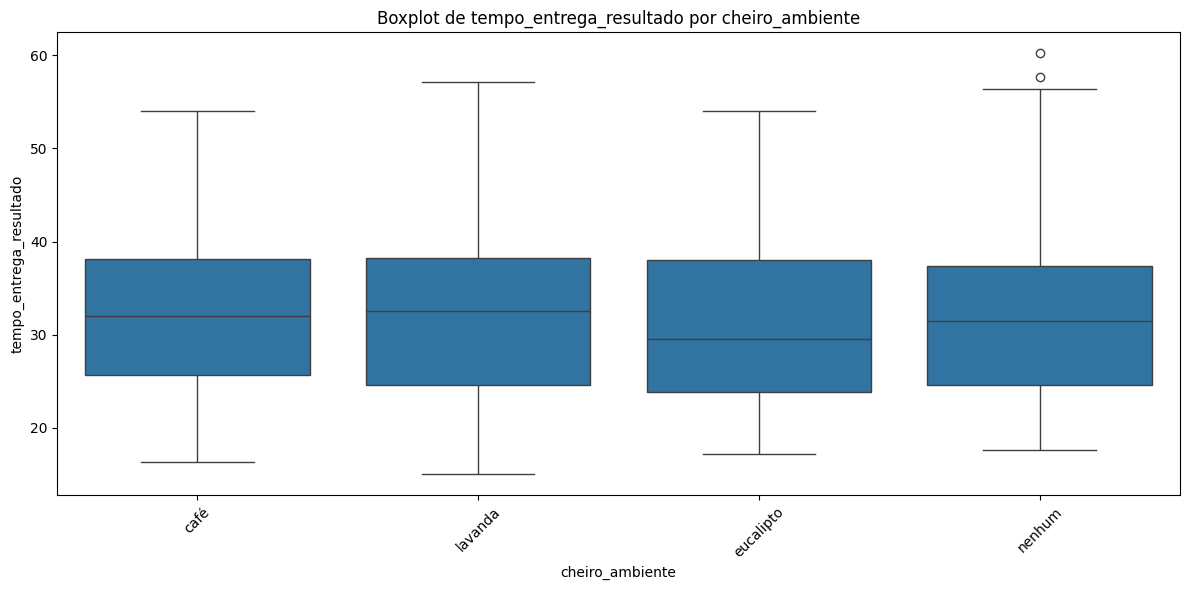

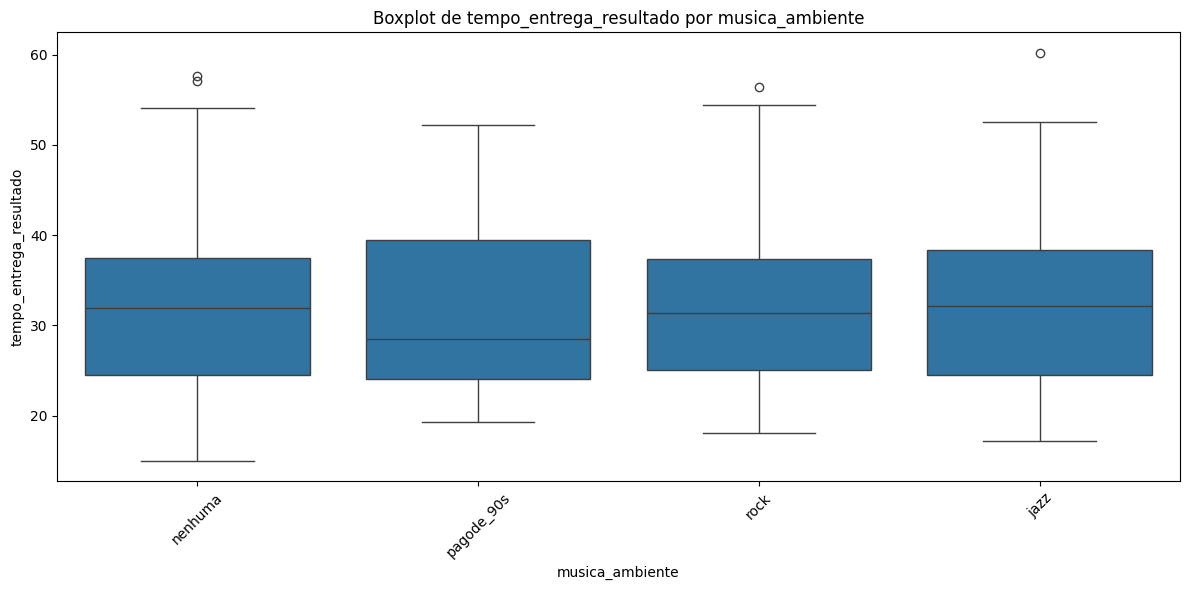

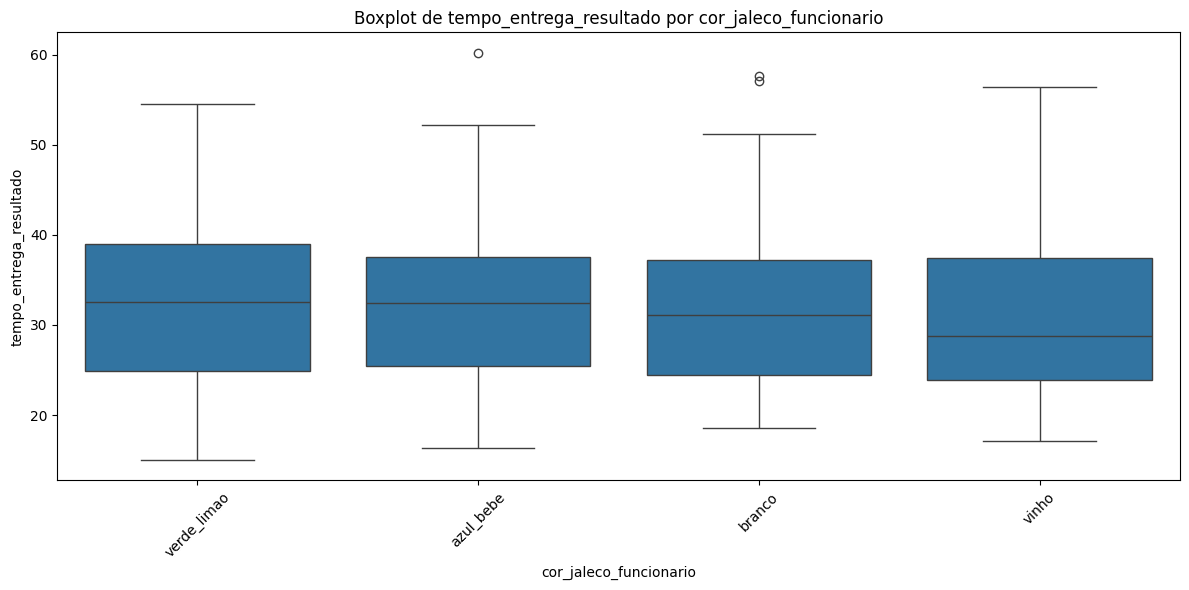

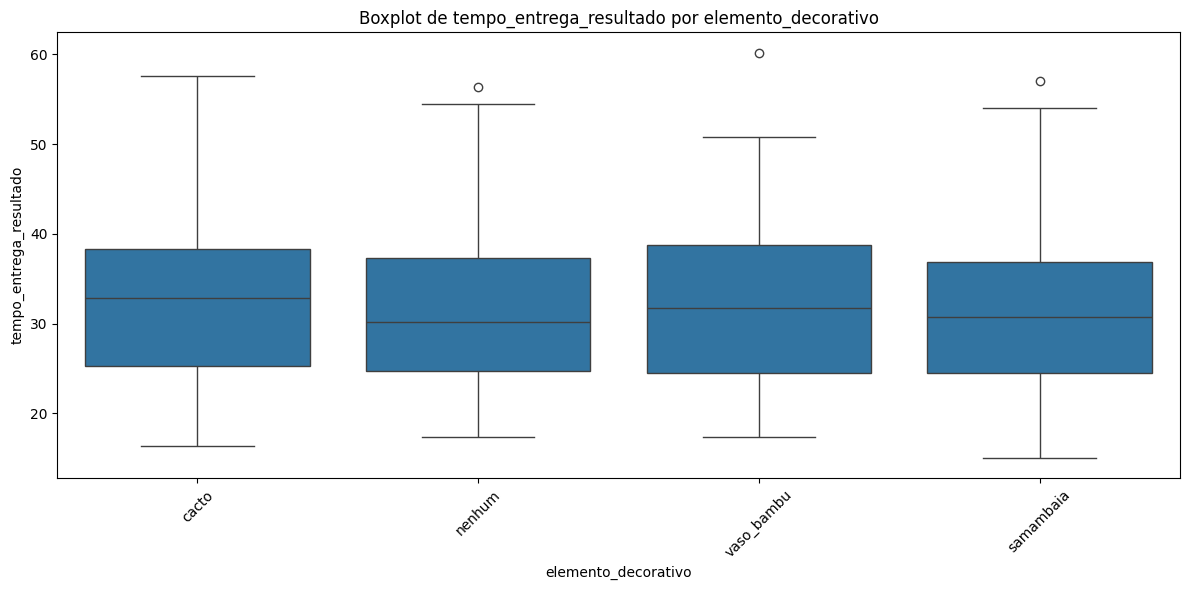

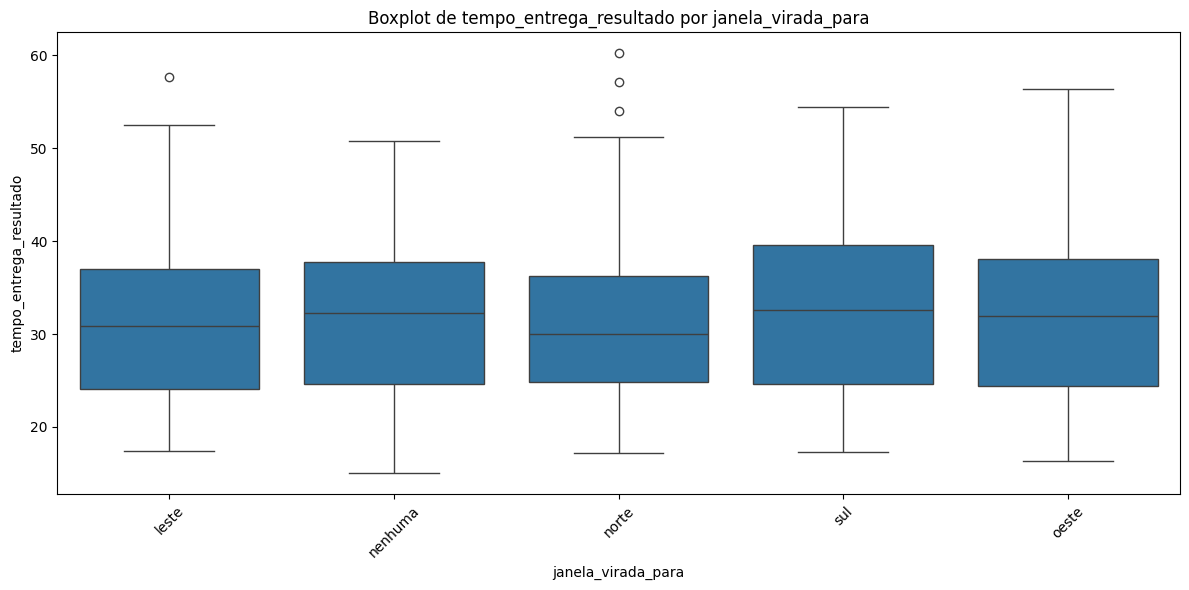

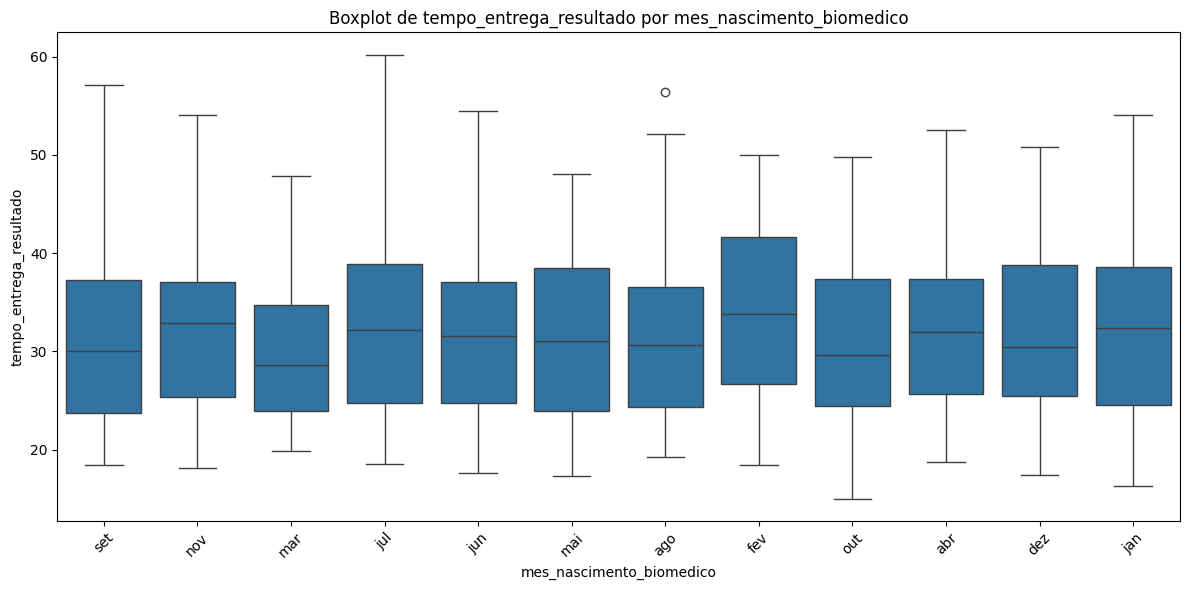

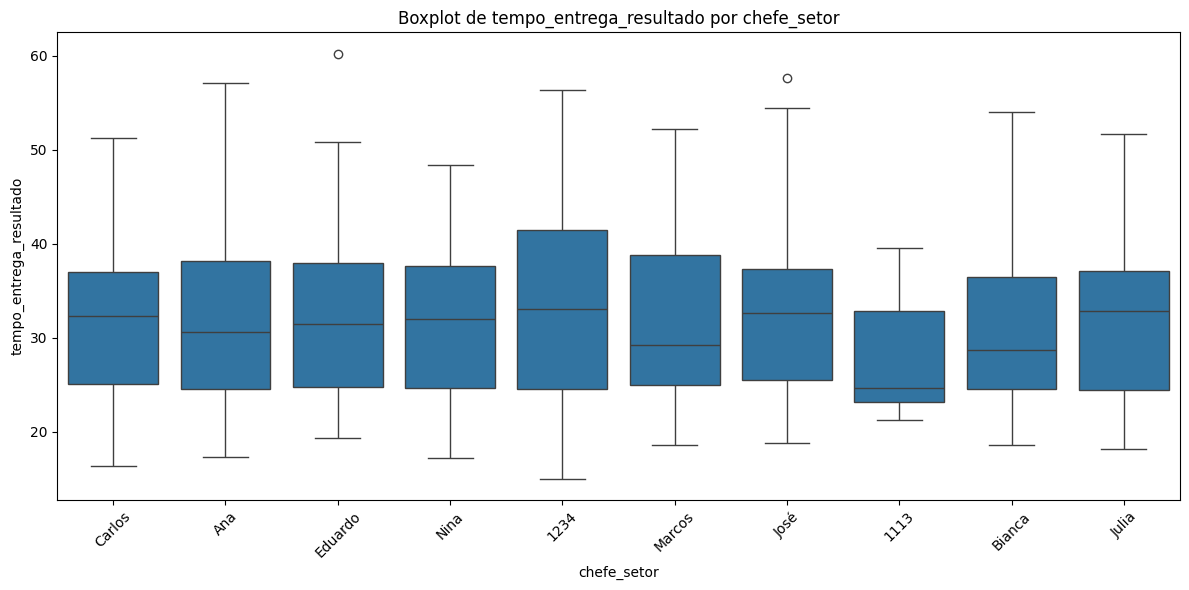

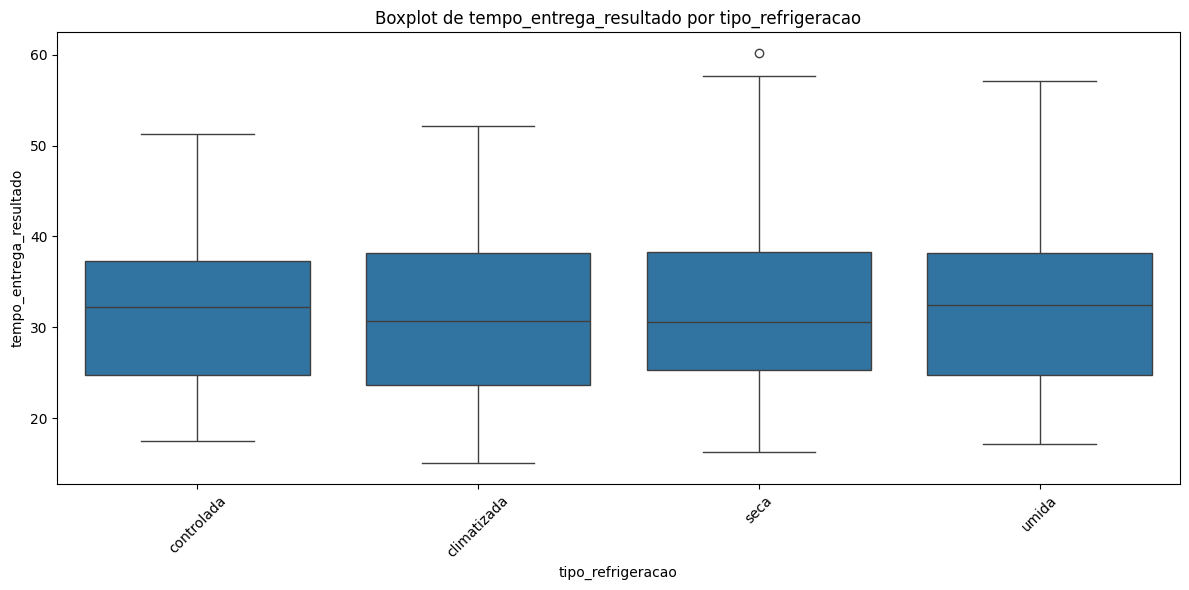

In [22]:
for col in cat_cols:
    if col != 'tempo_entrega_resultado':
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=col, y='tempo_entrega_resultado', data=df)
        plt.xticks(rotation=45)
        plt.title(f'Boxplot de tempo_entrega_resultado por {col}')
        plt.tight_layout()
        plt.show()

Alguns valores possíveis se destacaram, então vamos verificar e talvez remover eles

In [23]:
print(df['cor_parede_laboratorio'].value_counts())
print("---")
print(df['janela_virada_para'].value_counts())
print("---")
print(df['chefe_setor'].value_counts())
print("---")
print(df['tipo_exame'].value_counts())

cor_parede_laboratorio
amarela         136
azul            125
cinza           123
laranja         110
grafite         105
verde           103
branca          103
vinho            97
azul_cobalto     90
GRAFITE #007      8
Name: count, dtype: int64
---
janela_virada_para
nenhuma    213
oeste      205
sul        196
leste      194
norte      192
Name: count, dtype: int64
---
chefe_setor
Carlos     126
Julia      112
Bianca     111
Eduardo    111
Marcos     111
Nina       111
Ana        107
José       102
1234       101
1113         8
Name: count, dtype: int64
---
tipo_exame
sangue      275
urina       168
imagem      126
covid       116
genético    107
alergia     103
hormonal     95
??!!##       10
Name: count, dtype: int64


In [24]:
# Remover linhas com valores inválidos
df = df[df['tipo_exame'] != '??!!##']
df = df[df['chefe_setor'] != '1113']

In [25]:
y = df['tempo_entrega_resultado'].astype(float)


X_num = df[num_cols].drop('tempo_entrega_resultado', axis=1)
X_cat = pd.get_dummies(df[cat_cols], drop_first=True)


X = pd.concat([X_num, X_cat], axis=1).astype(float)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
coef = pd.Series(model.coef_, index=X.columns)
print(model.score(X_test, y_test))
print(coef.sort_values())


0.7503356420046723
tipo_exame_urina               -16.847391
tipo_exame_covid               -14.045723
tipo_exame_sangue              -13.922376
tipo_exame_hormonal             -7.528539
tipo_exame_imagem               -4.478319
                                  ...    
cor_parede_laboratorio_azul      1.372093
turno_mais_movimentado_tarde     1.675238
turno_mais_movimentado_noite     2.927268
tipo_exame_genético              3.658502
protocolo_emergencia_sim         8.528204
Length: 102, dtype: float64


In [26]:
X_const = sm.add_constant(X)
model_sm = sm.OLS(y, X_const).fit()

print(model_sm.summary())

                               OLS Regression Results                              
Dep. Variable:     tempo_entrega_resultado   R-squared:                       0.812
Model:                                 OLS   Adj. R-squared:                  0.790
Method:                      Least Squares   F-statistic:                     37.26
Date:                     Mon, 29 Sep 2025   Prob (F-statistic):          1.67e-255
Time:                             15:54:48   Log-Likelihood:                -2666.4
No. Observations:                      982   AIC:                             5539.
Df Residuals:                          879   BIC:                             6042.
Df Model:                              102                                         
Covariance Type:                 nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

### Verificando variáveis irrelevantes
- apesar da recomendação do instrutor de feng shui, o pagode dos anos 90 não afeta a produtividade

In [27]:
X_const = sm.add_constant(X)
model_sm = sm.OLS(y, X_const).fit()

# Filtra variáveis com p-value >= 0.05
irrelevant_vars = model_sm.pvalues[model_sm.pvalues >= 0.05]


print(f"p-valor do pagode anos 90: {irrelevant_vars['musica_ambiente_pagode_90s']}\n")

print("Variáveis estatisticamente irrelevantes (p ≥ 0.05):")
print(irrelevant_vars.sort_values().to_string())

p-valor do pagode anos 90: 0.985838968638894

Variáveis estatisticamente irrelevantes (p ≥ 0.05):
mes_jun/2025                              0.051466
mes_nov/2024                              0.065726
cor_parede_coleta_azul_cobalto            0.081314
mes_set/2025                              0.090693
direcao_centrifuga_oeste                  0.091714
direcao_centrifuga_sul                    0.099043
cor_jaleco_funcionario_vinho              0.106355
elemento_decorativo_vaso_bambu            0.127262
mes_mar/2024                              0.134620
chefe_setor_Nina                          0.152344
mes_nascimento_biomedico_out              0.154349
cor_jaleco_funcionario_verde_limao        0.160355
tipo_refrigeracao_umida                   0.174329
mes_jul/2024                              0.184166
cor_parede_laboratorio_verde              0.202447
cheiro_ambiente_eucalipto                 0.208187
mes_fev/2025                              0.216688
chefe_setor_Ana                    

In [28]:
X_const = sm.add_constant(X)
model_sm = sm.OLS(y, X_const).fit()
irrelevant_vars = model_sm.pvalues[model_sm.pvalues >= 0.05].index.tolist()
irrelevant_vars = [var for var in irrelevant_vars if var != 'const']
X_reduced = X.drop(columns=irrelevant_vars)


model = LinearRegression()
model.fit(X_reduced, y)


coef = pd.Series(model.coef_, index=X_reduced.columns)
print(model.score(X_reduced, y))
print("Coeficientes do modelo com variáveis significativas:")
print(coef.sort_values().to_string())


X_reduced_const = sm.add_constant(X_reduced)
model_sm_reduced = sm.OLS(y, X_reduced_const).fit()


print(model_sm_reduced.summary())

0.7933823935084623
Coeficientes do modelo com variáveis significativas:
tipo_exame_urina               -16.880801
tipo_exame_sangue              -13.837184
tipo_exame_covid               -13.694258
tipo_exame_hormonal             -7.931117
tipo_exame_imagem               -4.199997
pacientes_dia                    0.038802
hora_inicio_turno                0.079263
temp_medio_exame                 0.220279
turno_mais_movimentado_tarde     1.471502
turno_mais_movimentado_noite     2.541065
tipo_exame_genético              3.811568
protocolo_emergencia_sim         8.752821
                               OLS Regression Results                              
Dep. Variable:     tempo_entrega_resultado   R-squared:                       0.793
Model:                                 OLS   Adj. R-squared:                  0.791
Method:                      Least Squares   F-statistic:                     310.1
Date:                     Mon, 29 Sep 2025   Prob (F-statistic):          1.14e-321
Time

# Mudanças a serem feitas:
### Nos turnos:

In [29]:
# Quantidade de exames por turno
df.groupby('turno_mais_movimentado')['exames_realizados'].sum()


turno_mais_movimentado
manhã    25238
noite    10303
tarde    23040
Name: exames_realizados, dtype: int64

In [30]:
# Número de exames em cada turno
manha = 25441
tarde = 23278
noite = 10358

# Coeficientes
coef_tarde = 1.470843
coef_noite = 2.574683

# Total de exames
total_exames = manha + tarde + noite

# Redução de tempo se todos fossem como o turno da manhã (coef = 0)
reducao_total = (tarde * coef_tarde + noite * coef_noite)
reducao_media_por_exame = reducao_total / total_exames

print(f'Redução total: {reducao_total}, Redução média por exame: {reducao_media_por_exame}')


Redução total: 60906.849868, Redução média por exame: 1.0309739808724208


### No número de pacientes

In [31]:
coef_pacientes = 0.040515
print(f'O tempo pra cada exame aumenta em {coef_pacientes:.2f} horas, ou {coef_pacientes * 60:.2f} minutos por paciente')


teste = 3.2 / coef_pacientes
print(teste)
print(f'Com 54 pacientes a menos o tempo seria reduzido em {coef_pacientes * 54:.2f} horas')

O tempo pra cada exame aumenta em 0.04 horas, ou 2.43 minutos por paciente
78.98309268172282
Com 54 pacientes a menos o tempo seria reduzido em 2.19 horas


### No horário de início do turno

In [32]:
print(df['hora_inicio_turno'].min())

5


In [33]:
coef_hora_inicio = 0.085752
hora_min = 5


dif_media = df['hora_inicio_turno'].mean() - hora_min
tempo_economizado_total_h = dif_media * coef_hora_inicio
tempo_economizado_por_exame_h = tempo_economizado_total_h / df['exames_realizados'].sum()


tempo_economizado_por_exame_min = tempo_economizado_por_exame_h * 60
print(f"Tempo economizado por exame: {tempo_economizado_por_exame_min} minutos")
print(f"A diferença é minuscula, então isso vai ser descartado")

Tempo economizado por exame: 0.0002962221758436305 minutos
A diferença é minuscula, então isso vai ser descartado


### Nos protocolos de emergência

In [34]:
print("Por algum motivo, exames feitos com protocolos de emergência são MAIS LENTOS do que os normais")
print(f"Um exame de emergência demora em média {8.751563:.2f} horas a mais, tendo coeficiente {8.751563}")

Por algum motivo, exames feitos com protocolos de emergência são MAIS LENTOS do que os normais
Um exame de emergência demora em média 8.75 horas a mais, tendo coeficiente 8.751563
